In [94]:
# Regression Modeling 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [95]:
# 1 Linear Regression Model / Insurance Forecast

data = pd.read_csv('data/insurance.csv', sep=",", header=0)

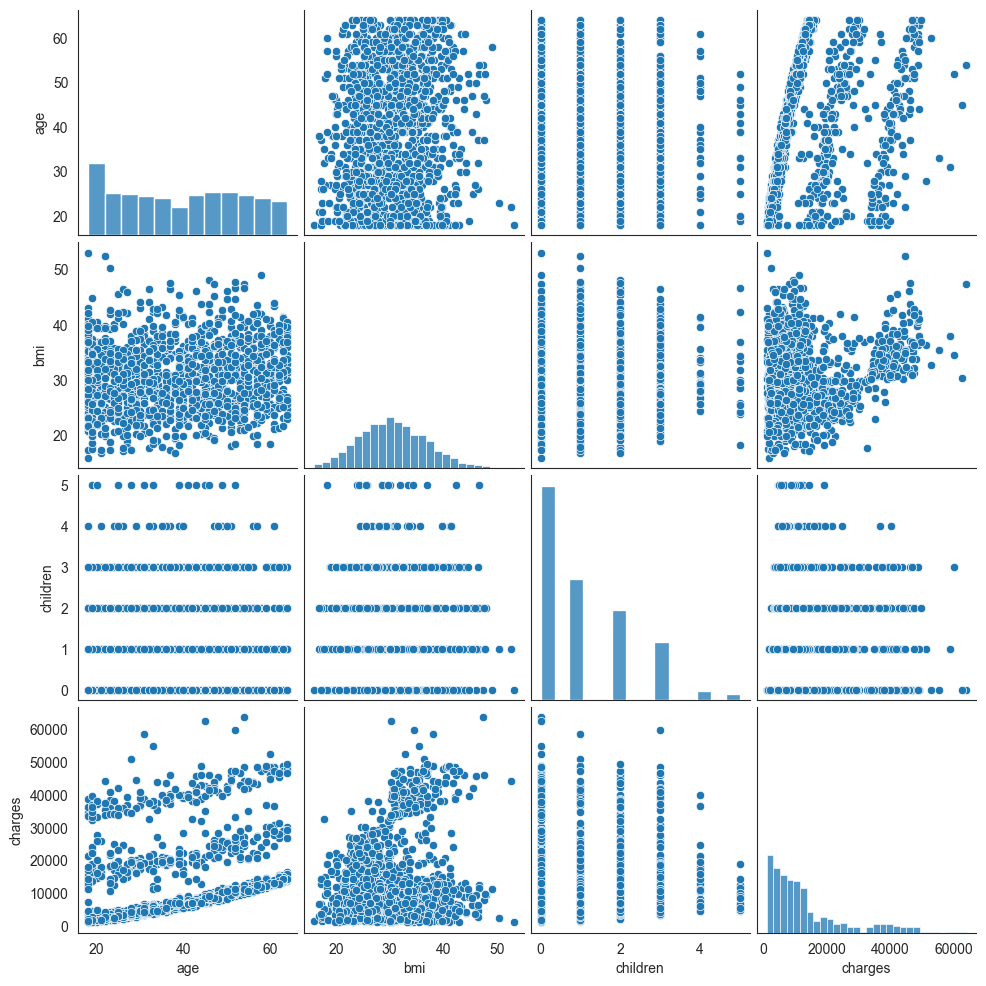

In [96]:
sns.set_style("white")
sns.pairplot(data)
plt.show()

In [97]:
# We see some correlation for charges and age as well as for bmi and age,
# so we will investigate these two types

In [98]:
r = np.corrcoef(data.bmi,data.age)
r

array([[1.        , 0.10927188],
       [0.10927188, 1.        ]])

In [99]:
r = np.corrcoef(data.age,data.charges)
r

array([[1.        , 0.29900819],
       [0.29900819, 1.        ]])

In [100]:
r = np.corrcoef(data.bmi,data.charges)
r

array([[1.        , 0.19834097],
       [0.19834097, 1.        ]])

In [101]:
# The best correlation relationship is age with charges, still having a very small
# correlation coefficient of 0.3

In [102]:
X = data.age.values
X = X[:, np.newaxis]

# For Y it is enough to extract the values,
# because Scikit already expects it to be 1D
Y = data.charges.values

# Now we load the required function from the scikit module
from sklearn.linear_model import LinearRegression
# Create the model
modelXY = LinearRegression(fit_intercept=True)
# Fit the model to 
XY_fit = modelXY.fit(X, Y)

# And extract the coefficients. 
# Note that b1 is returned as an array 
b1 = XY_fit.coef_[0]
b0 = XY_fit.intercept_

print("The regression line is y = {:.6} + {:.6} x".format(b0, b1))



The regression line is y = 3165.89 + 257.723 x


In [103]:
# Create an array from the list of X coordinates of new observtions
X_new = np.array([0.3])
# Make it 2D
X_new = X_new[:, np.newaxis]
# Use the predict method from our model
Y_new = XY_fit.predict(X_new)
# Look at the predicted values
Y_new

array([3243.20179166])

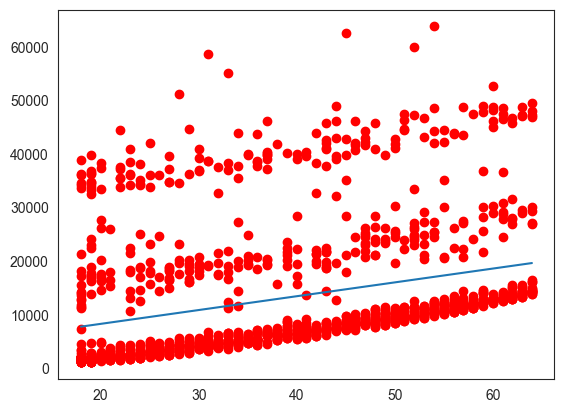

In [104]:
# The linspace funtion generates the grid
X_new = np.linspace(X.min(), X.max(), num = 100)
# Make it 2D
X_new = X_new[:, np.newaxis]

# Predict the corresponding Y-values
Y_new = XY_fit.predict(X_new)

#Plot the sample
plt.plot(X, Y, 'ro')
# And the regression line = "predicted points"
plt.plot(X_new, Y_new)
plt.show()

In [105]:
# The reegression line is not really ideal but would make sense, taking into
# account that many values of the charges are below 10k

In [106]:
# Now we create our regression model
model_DF0 = LinearRegression(fit_intercept=True)
X = data.age.values[:, np.newaxis]
Y = data.charges.values
model_DF0 = LinearRegression(fit_intercept=True)
DF0_fit = model_DF0.fit(X, Y)

In [107]:
b1 = DF0_fit.coef_[0]
b0 = DF0_fit.intercept_
print("b0 = {:.6}, b1 = {:.6}".format(b0, b1))

b0 = 3165.89, b1 = 257.723


In [108]:
model_DF0_resid = Y - DF0_fit.predict(X)

In [109]:
# The sample size
n = len(data)
# Uncomment the following line to see that the mean of the residuals is 0
# print(model_DF_resid.mean())
resid_variance = (model_DF0_resid**2).sum() / (n - 2)
print("The residual variance for this data and regression line is {:.6}".format(resid_variance))

The residual variance for this data and regression line is 1.33641e+08


In [110]:
# Looking at the residual variance (very  high), the model is not really able to explain
# the variation in  the  data

In [111]:
b0_variance = resid_variance * (1 / n + X.mean()**2/ ((X - X.mean())**2).sum())
b1_variance = resid_variance / ((n - 1) * X.std(ddof = 1)**2)

b0_se = np.sqrt(b0_variance) 
b1_se = np.sqrt(b1_variance)

print("b0_se = {:.6}".format(b0_se))
print("b1_se = {:.6}".format(b1_se))

b0_se = 937.149
b1_se = 22.5024


In [112]:
alpha = 0.05
talpha = stats.t.isf(alpha / 2, df = n - 2)

CI_beta1 = b1 + np.array([-1, 1]) * talpha * b1_se

print("The confidence interval for the regression model slope is [{:.4}, {:.4}]".format(CI_beta1[0], CI_beta1[1]))



The confidence interval for the regression model slope is [213.6, 301.9]


In [113]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
X_1 = sm.add_constant(data.age)
print(X_1)

model_DF0 = sm.OLS(data.charges,data.age) # OLS comes from Ordinary Least Squares

      const  age
0       1.0   19
1       1.0   18
2       1.0   28
3       1.0   33
4       1.0   32
...     ...  ...
1333    1.0   50
1334    1.0   18
1335    1.0   18
1336    1.0   21
1337    1.0   61

[1338 rows x 2 columns]


In [114]:
DF0_fit = model_DF0.fit()

In [115]:
DF0_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.583
Model:                            OLS   Adj. R-squared (uncentered):              0.583
Method:                 Least Squares   F-statistic:                              1868.
Date:                Tue, 01 Nov 2022   Prob (F-statistic):                   3.95e-256
Time:                        16:38:45   Log-Likelihood:                         -14421.
No. Observations:                1338   AIC:                                  2.884e+04
Df Residuals:                    1337   BIC:                                  2.885e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          329.2873      7.618     43.224      0.000     314.343     344.232
==============================================================================
Omnibus:                      393.480   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              840.455
Skew:                           1.714   Prob(JB):                    3.14e-183
Kurtosis:                       4.823   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
DF0_fit.pvalues

age    3.951600e-256
dtype: float64

In [117]:
# The p-value is so small that we reject the null hypothesis, indicatig a correlation
# for variables age and charges

In [135]:
X_new = np.linspace(X.min(), X.max(), 1338)
X_new = sm.add_constant(X_new)
X_new[:5, :]

array([[ 1.        , 18.        ],
       [ 1.        , 18.03440539],
       [ 1.        , 18.06881077],
       [ 1.        , 18.10321616],
       [ 1.        , 18.13762154]])

In [136]:
DF0_fit.pred = DF0_fit.get_prediction(X)

In [137]:
DF0_fit.pred.summary_frame(alpha=0.05).head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,6256.458175,144.743577,5972.508927,6540.407424,-16511.767283,29024.683634
1,5927.170903,137.125494,5658.166352,6196.175454,-16840.873080,28695.214886
2,9220.043627,213.306324,8801.592103,9638.495150,-13550.256438,31990.343691
3,10866.479989,251.396739,10373.304978,11359.654999,-11905.315833,33638.275810
4,10537.192716,243.778656,10058.962403,11015.423029,-12234.284346,33308.669778


In [138]:
DF0_fit_fitted_new = DF0_fit.pred.summary_frame(alpha=0.05)["mean"]
DF0_fit_confBand_low = DF0_fit.pred.summary_frame(alpha=0.05)["mean_ci_lower"]
DF0_fit_confBand_high = DF0_fit.pred.summary_frame(alpha=0.05)["mean_ci_upper"]
DF0_fit.pred.summary_frame(alpha=0.95).head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,6256.458175,144.743577,6247.380068,6265.536283,5528.537973,6984.378378
1,5927.170903,137.125494,5918.570591,5935.771215,5199.256502,6655.085303
2,9220.043627,213.306324,9206.665363,9233.421890,8492.057097,9948.030156
3,10866.479989,251.396739,10850.712750,10882.247228,10138.445638,11594.514339
4,10537.192716,243.778656,10521.903272,10552.482160,9809.168557,11265.216875
